In [1]:
import importlib

import numpy as np
from matplotlib import pyplot as plt

from analysis import session, acr_sess_analys
from sess_util import sess_gen_util, sess_ntuple_util
from util import gen_util, math_util, plot_util

importlib.reload(acr_sess_analys)

<module 'analysis.acr_sess_analys' from '/home/colleen/Documents/AIBS_Analysis/analysis/acr_sess_analys.py'>

In [2]:
plot_util.linclab_plt_defaults()

In [3]:
def get_data(sessid):
    datadir = '../data/AIBS'
    sess = session.Session(datadir, sessid, runtype='prod')
    sess.extract_sess_attribs()
    sess.extract_info()
    all_data = gen_util.reshape_df_data(sess.get_roi_traces(remnans=False), squeeze_cols=True)
    return all_data

In [4]:
def get_vars(all_data):
    upvar = np.where(np.var(all_data, axis=1) > 0.1)[0]
    low_vals = np.where(np.absolute(np.min(all_data, axis=1)) > np.absolute(np.max(all_data, axis=1)))[0]
    low_mean = np.where(np.mean(all_data, axis=1) < 0)[0]
    rel_high_median = np.where((np.median(all_data, axis=1) - np.min(all_data, axis=1))/
        (np.max(all_data, axis=1) - np.min(all_data, axis=1)) > 0.5)[0]
    print(f'High variance: {upvar}')
    print(f'Low values: {low_vals}')
    print(f'Low mean: {low_mean}')
    print(f'Relative high median: {rel_high_median}')
    return upvar, low_vals, low_mean, rel_high_median

In [17]:
def plot_traces(all_data): 
    plot_vals = sorted(set(np.concatenate([low_mean, rel_high_median])))
    red = len(plot_vals)
    plot_vals += sorted(set(np.concatenate([low_vals, upvar])) - set(plot_vals))
    plot_vals = plot_vals[:20]
    fig, ax = plt.subplots(len(plot_vals), figsize=[10, len(plot_vals) * 2], squeeze=False)
    for i in range(len(plot_vals)):
        color = plot_util.LINCLAB_COLS['blue']
        if i < red:
            color = plot_util.LINCLAB_COLS['red']
        ax[i, 0].plot(all_data[plot_vals[i]], color=color, label=plot_vals[i], lw=1.0)
        ax[i, 0].legend()


Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in ../data/AIBS/prod/mouse_413663/ophys_session_764704289
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...
High variance: [  1   3  14  31  56  88  95 108 112 122 146 153 154 215 244 249 254 267
 293 298 305 327 349 358 366 409 415 433 490 524 526 535 540 541 558 566
 616 642]
Low values: [244 298 305]
Low mean: [244 305]
Relative high median: [244 298 305]


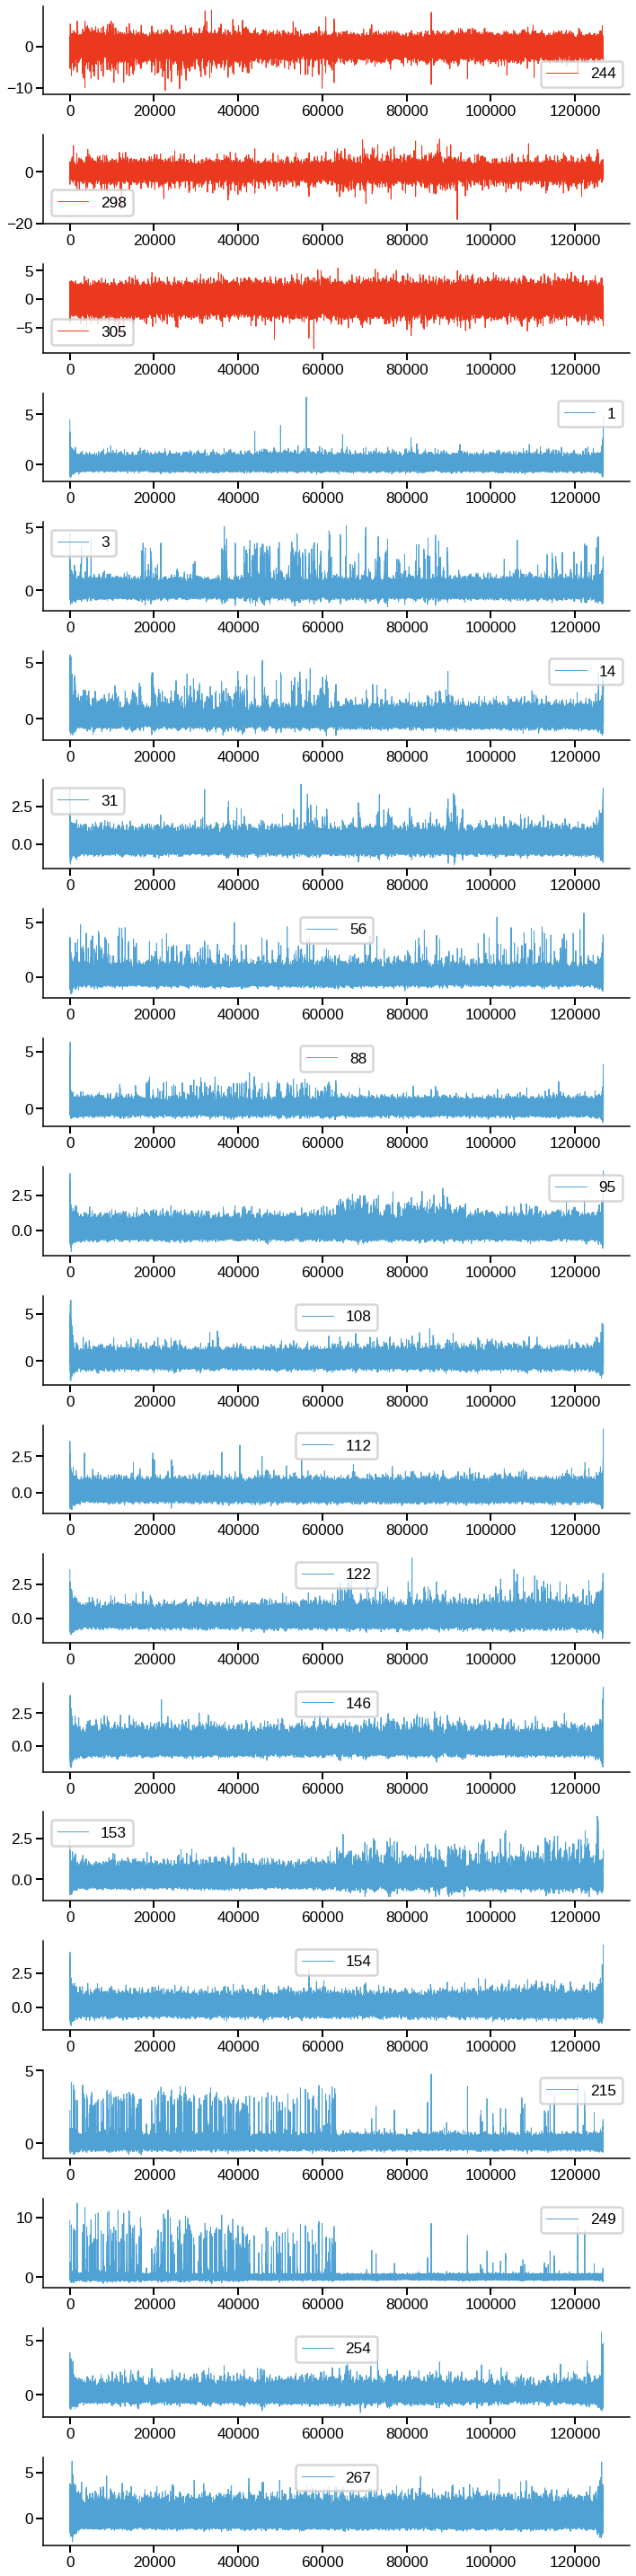

In [18]:
sessid = 764704289
data = get_data(sessid)
upvar, low_vals, low_mean, rel_high_median = get_vars(data)
plot_traces(data)


Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in ../data/AIBS/prod/mouse_433448/ophys_session_826338612
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...
High variance: [   0    1    3    4    9   12   14   15   23   24   30   38   40   46
   51   53   55   58   60   62   63   65   67   71   77   83   84   95
   96   97   98  100  102  107  108  112  115  118  119  124  128  135
  137  139  144  146  148  149  152  153  154  155  157  158  159  166
  171  175  179  181  186  187  188  191  195  196  197  198  199  202
  204  205  206  207  208  210  211  212  214  216  218  220  222  223
  227  229  230  231  233  234  235  238  239  241  243  246  247  249
  250  251  254  258  259  260  262  264  265  267  269  271  272  275
  276  278  279  280  281  283  285  287  291  293  294  296  300  303
  305  309  311  312  316  318  320  326  332  334  335  336  338  339
  341  343  346  347  34

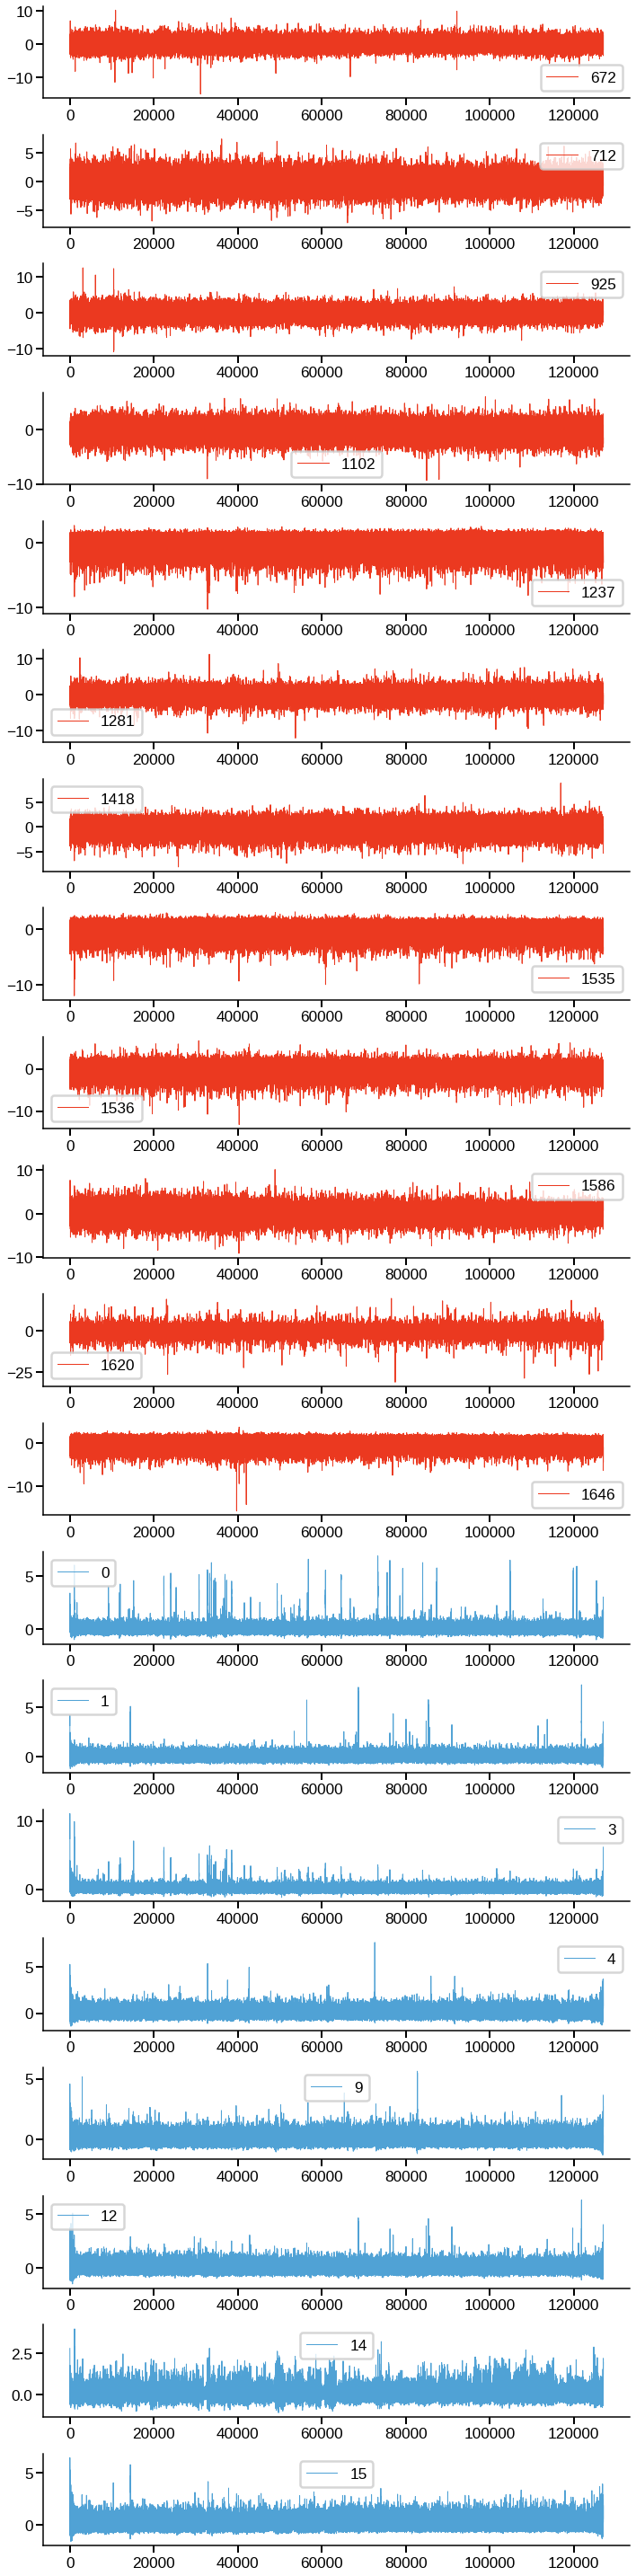

In [19]:
sessid = 826338612
data = get_data(sessid)
upvar, low_vals, low_mean, rel_high_median = get_vars(data)
plot_traces(data)


Loading stimulus dictionary...
Loading alignment dataframe...
    NOTE: Stimulus alignment pickle already exists in ../data/AIBS/prod/mouse_433458/ophys_session_826659257
Loading sync h5 info...
Creating stimulus objects...
Loading ROI trace info...
High variance: [ 25  44  68  86  87  97 103 107 123]
Low values: [87]
Low mean: [87]
Relative high median: [87]


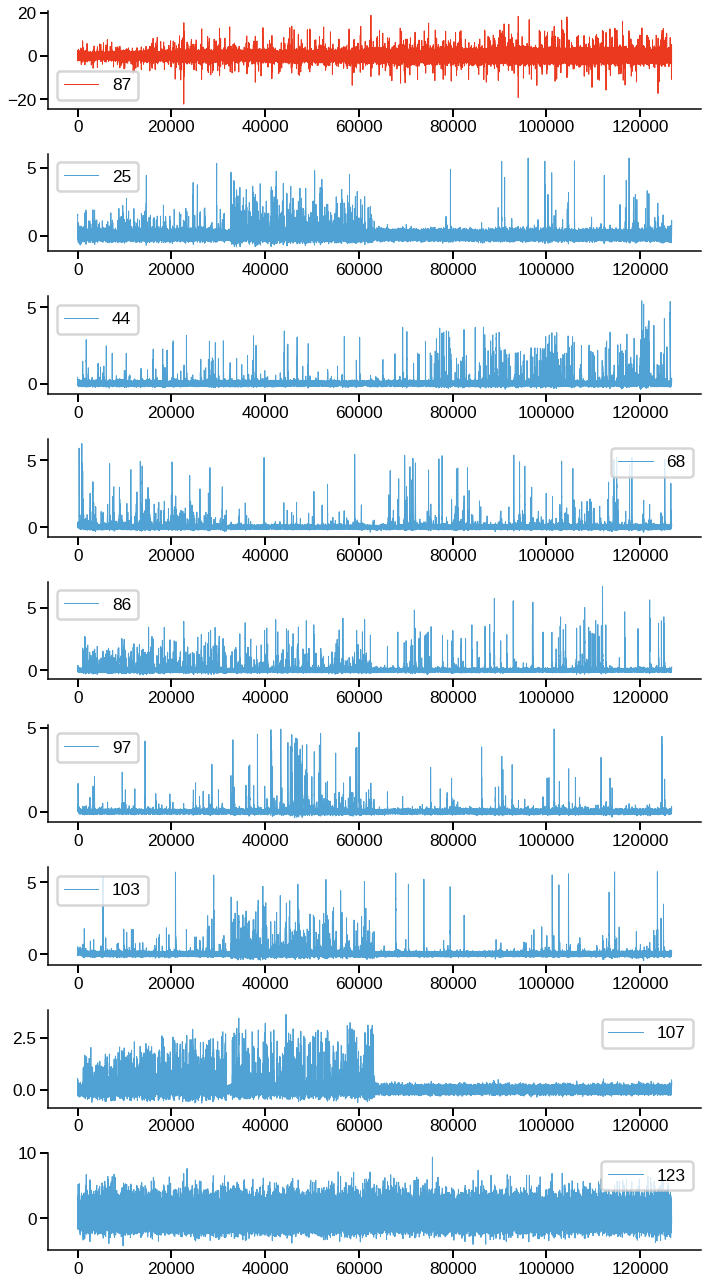

In [20]:
sessid = 826659257 # soma
data = get_data(sessid)
upvar, low_vals, low_mean, rel_high_median = get_vars(data)
plot_traces(data)